In [24]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Flatten
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [25]:
nc = 10 # Number of classes

#This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, 
#along with a test set of 10,000 images. This dataset can be used as a drop-in 
#replacement for MNIST.

(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

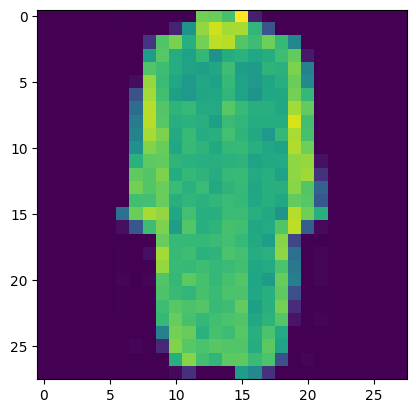

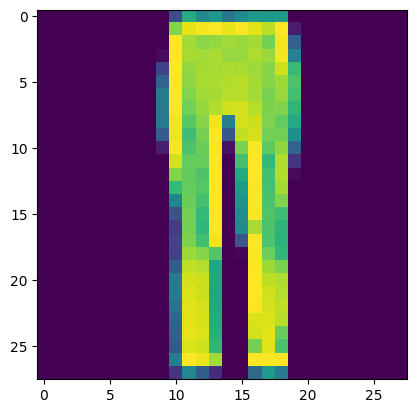

In [26]:
#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(60000)])
plt.show()

In [27]:
Xtrain = Xtrain.reshape(60000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
# converted to a numerical array of size nc x 1
# like 0000100000 or 0100000000
oh = OneHotEncoder()
ytrainEnc = oh.fit_transform([[elem] for elem in ytrain]).toarray()
ytrainEnc

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
ytestEnc = oh.fit_transform([[elem] for elem in ytest]).toarray()
ytestEnc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3,activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [31]:
model.fit(Xtrain, ytrainEnc, validation_data=(Xtest, ytestEnc), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 70s 37ms/step - loss: 0.5899 - accuracy: 0.8332 - val_loss: 0.4250 - val_accuracy: 0.8536
Epoch 2/3
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3358 - accuracy: 0.8787 - val_loss: 0.3831 - val_accuracy: 0.8673
Epoch 3/3
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2815 - accuracy: 0.8956 - val_loss: 0.3736 - val_accuracy: 0.8690


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 18432)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [37]:
loss, accuracy = model.evaluate(Xtest, ytestEnc)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.1f}%')

313/313 [==============================] - 6s 20ms/step - loss: 0.3736 - accuracy: 0.8690
Test Loss: 0.3736, Test Accuracy: 86.9%
